In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import adjusted_rand_score, accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Load the data
df = pd.read_csv('points.csv')

# Check the number of rows and columns
print(f"Number of rows: {len(df)}")
print(f"Columns: {', '.join(df.columns)}")
df

Number of rows: 622
Columns: x, y, z, target


,x,y,z,target
0,20.604735,19.474115,19.452474,3
1,23.524815,8.490756,27.876346,3
2,24.696120,11.931028,-8.361890,3
3,23.516354,17.183918,3.555375,3
4,21.399873,13.812704,3.942708,3
...,...,...,...,...
617,26.497367,26.029564,4.815220,2
618,23.891117,24.658145,-0.091179,2
619,25.079437,26.400046,3.058729,2
620,27.184971,25.245569,12.261928,2


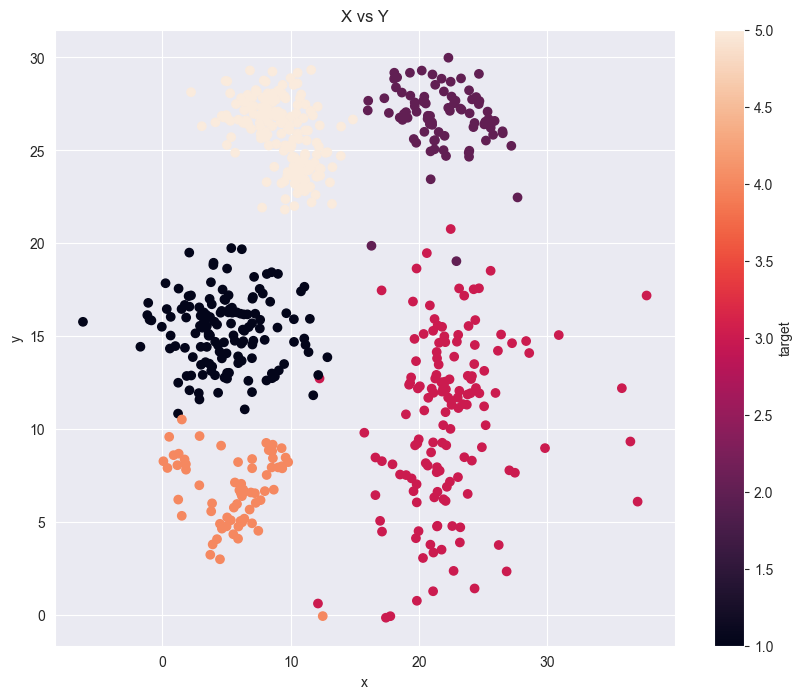

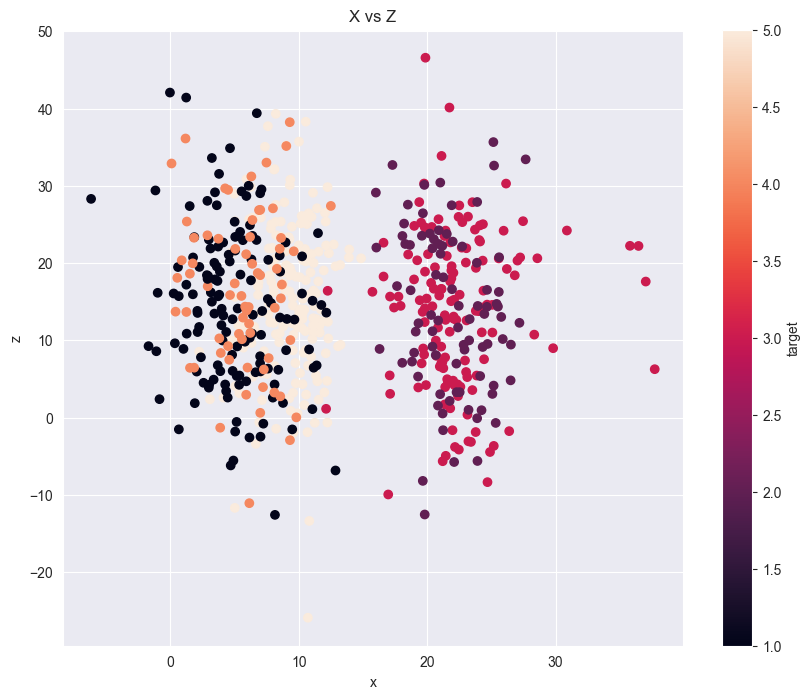

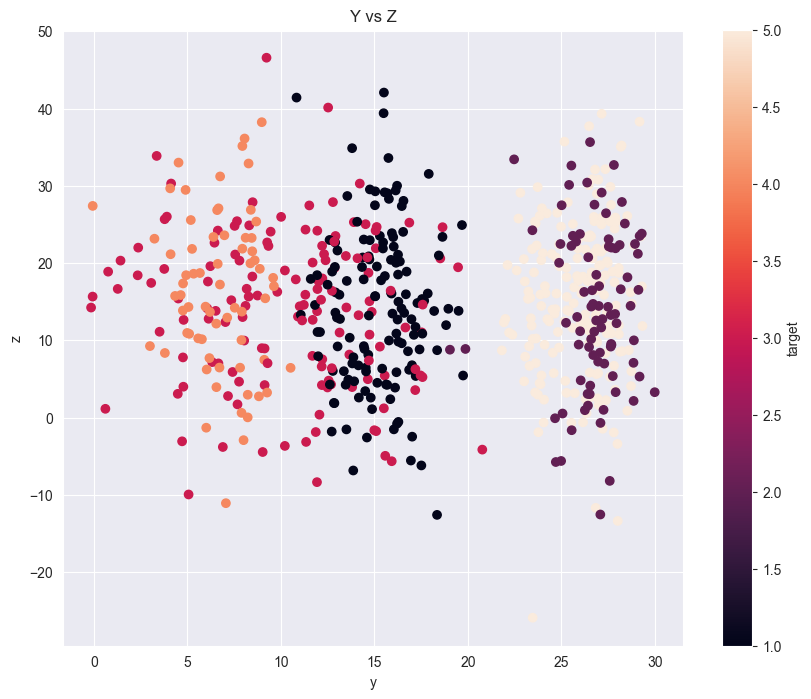

In [9]:
def plot_scatter(x, y, labels, title):
    plt.figure(figsize=(10, 8))
    plt.scatter(df[x], df[y], c=labels)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.colorbar(label='target')
    plt.show()

plot_scatter('x', 'y', df['target'], 'X vs Y')
plot_scatter('x', 'z', df['target'], 'X vs Z')
plot_scatter('y', 'z', df['target'], 'Y vs Z')

In [10]:
X = df[['x', 'y', 'z']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


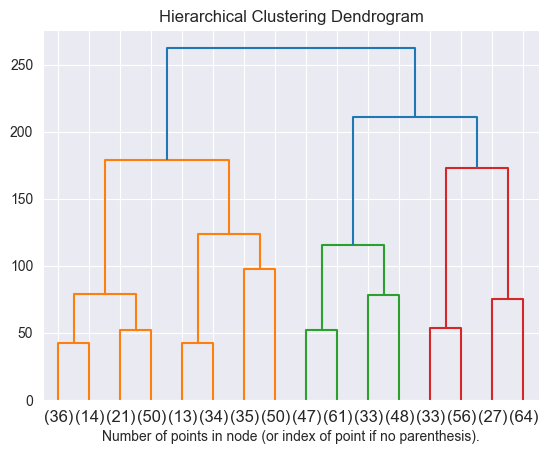

In [11]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Perform hierarchical clustering
hierarchical = AgglomerativeClustering(distance_threshold=0,n_clusters=None)
hierarchical = hierarchical.fit(X)

# Plot dendrogram
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(hierarchical, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()




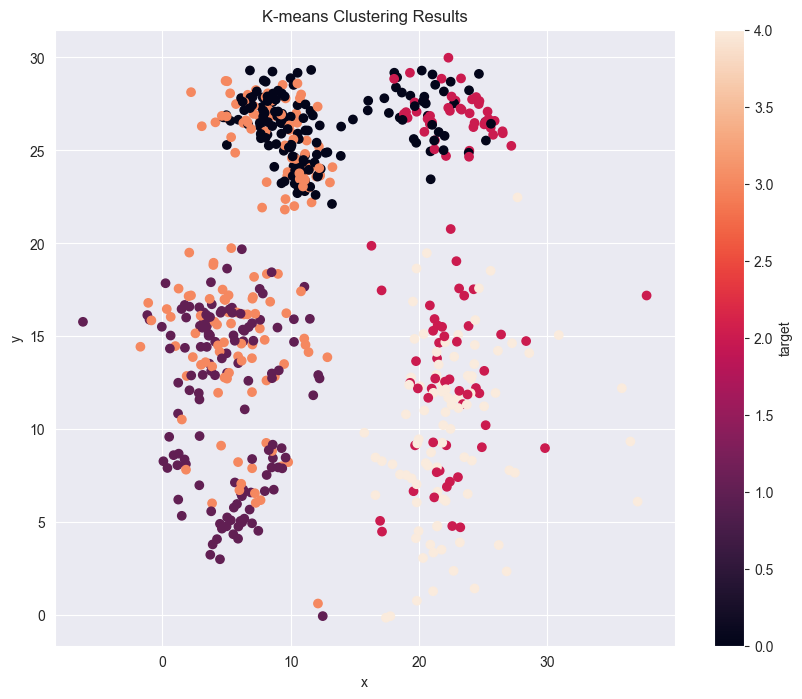

In [12]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Plot scatter plot with k-means clustering results
plot_scatter('x', 'y', kmeans.labels_, 'K-means Clustering Results')

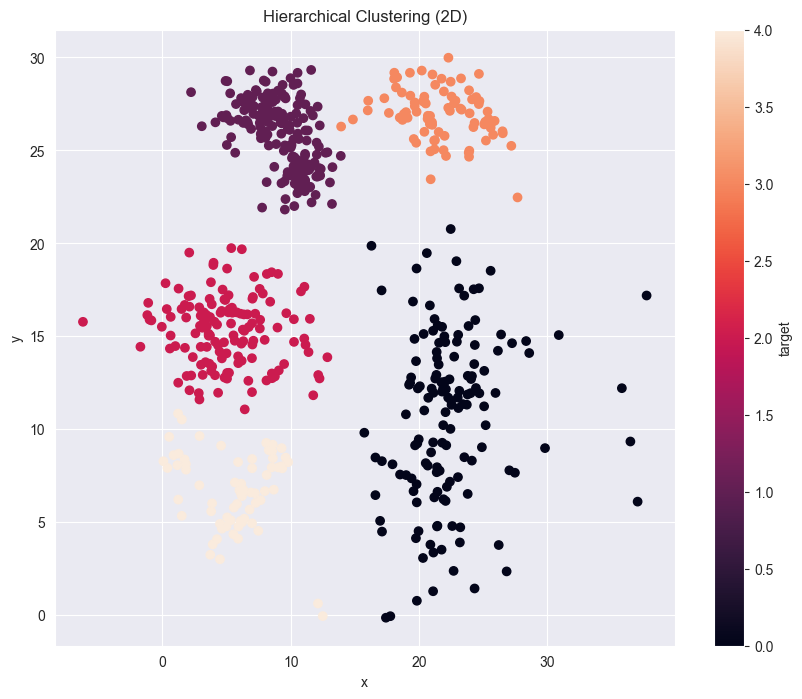

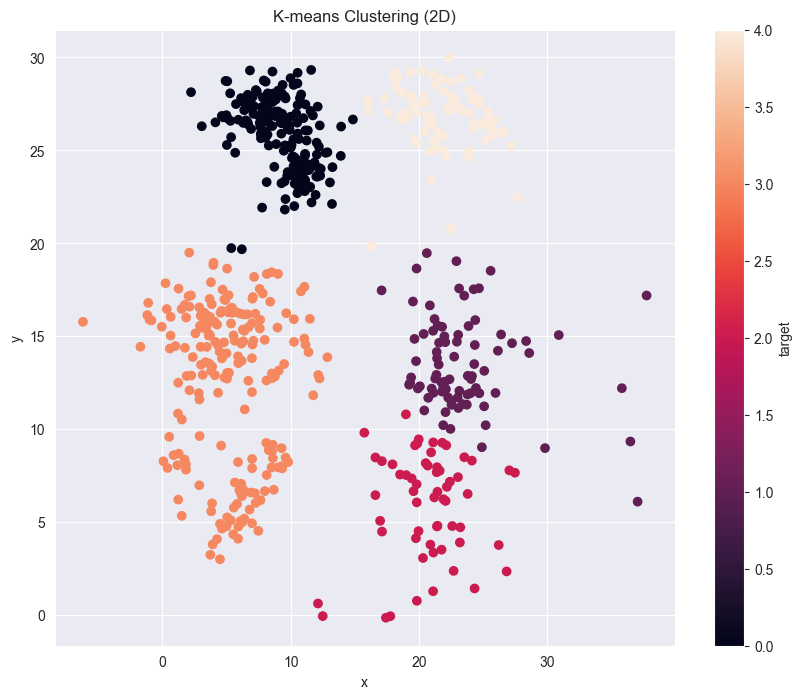

In [13]:
# Assuming 'x' and 'y' are the most informative dimensions
X_2d = df[['x', 'y']]

# Hierarchical clustering
hierarchical_2d = AgglomerativeClustering(n_clusters=5)
hierarchical_2d.fit(X_2d)

# K-means clustering
kmeans_2d = KMeans(n_clusters=5, random_state=42)
kmeans_2d.fit(X_2d)

# Plot results
plot_scatter('x', 'y', hierarchical_2d.labels_, 'Hierarchical Clustering (2D)')
plot_scatter('x', 'y', kmeans_2d.labels_, 'K-means Clustering (2D)')

In [14]:
# Calculate ARI for k-means with all variables
ari_kmeans = adjusted_rand_score(y, kmeans.labels_)

# Calculate ARI for k-means with two most informative variables
ari_kmeans_2d = adjusted_rand_score(y, kmeans_2d.labels_)

print(f"Adjusted Rand Index (all variables): {ari_kmeans:.4f}")
print(f"Adjusted Rand Index (2 variables): {ari_kmeans_2d:.4f}")

Adjusted Rand Index (all variables): 0.4192
Adjusted Rand Index (2 variables): 0.7806
